In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
simple_train = pd.read_csv('regression/square-simple-training.csv')
simple_test = pd.read_csv('regression/square-simple-test.csv')
steps_train = pd.read_csv('regression/steps-small-training.csv')
steps_test = pd.read_csv('regression/steps-small-test.csv')
multimodal_train = pd.read_csv('regression/multimodal-large-training.csv')
multimodal_test = pd.read_csv('regression/multimodal-large-test.csv')

/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/janpoglod/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# 1) Data research

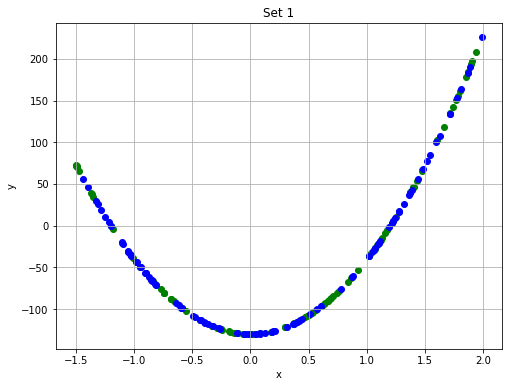

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(simple_train['x'], simple_train['y'], marker='o', color='green')
plt.scatter(simple_test['x'], simple_test['y'], marker='o', color='blue')
plt.title('Set 1')  
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

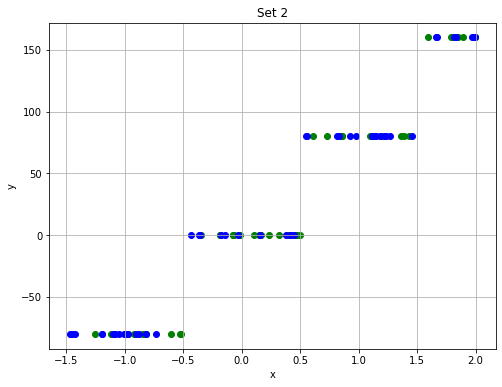

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(steps_train['x'], steps_train['y'], marker='o', color='green')
plt.scatter(steps_test['x'], steps_test['y'], marker='o', color='blue')
plt.title('Set 2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

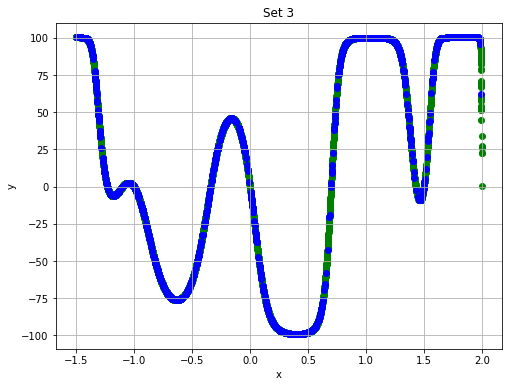

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(multimodal_train['x'], multimodal_train['y'], marker='o', color='green')
plt.scatter(multimodal_test['x'], multimodal_test['y'], marker='o', color='blue')
plt.title('Set 3')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# 2) Creating Layers

#### 5 neurons 1 layer:

In [4]:
def sigm(x):
    return 1 / (1 + np.exp(-x))
def mse_out(y,y_pred):
    difference = y - y_pred
    return np.mean(np.square(difference))

In [73]:
X=[[1,2,3,2.5],[2,5,-1,2],[-1.5,2.7,3.3,-0.8]]

class Layer_Dense:
    def __init__(self,n_input,n_neurons):
        self.weights = np.random.randn(n_input,n_neurons)
        self.biases = np.zeros((1,n_neurons))
    def forward(self,inputs):
        self.output = np.dot(inputs,self.weights) + self.biases

class Activation_ReLu:
    def forward(self, inputs):
        self.output = np.maximum(o,inputs)

layer1 = Layer_Dense(4,5)
layer1.forward(X)
print("Layer1 output: ")
print(layer1.output)
print("\n")

layer2 = Layer_Dense(5, 2)
layer2.forward(layer1.output)
print("Layer2 output: ")
print(layer2.output)

Layer1 output: 
[[-4.35252911 -1.14884519 -5.55031212 -5.15739668 -2.37153365]
 [-6.70944802 10.28540881 -5.50051823 -4.08687471 -4.74222623]
 [-3.57367367  3.39066111  0.27179429  0.03703452 -4.16692505]]


Layer2 output: 
[[-4.99131914  8.25162767]
 [-7.55085833 23.57384066]
 [-1.2842923  14.03262291]]


# 3) Creating function MLP

In [5]:
def mlp(x_train, y_train, x_test, y_test, norm,
        activation, iters, learn, inputs_n, neurons):
    
    # normalization:
    np.random.seed(100)
    if norm == 1:
        x_train_norm = (x_train - min(x_train)) / (max(x_train)+min(x_train))
        x_test_norm = (x_test - min(x_test)) / (max(x_test)+min(x_test))
        y_train_norm = (y_train - min(y_train)) / (max(y_train)+min(y_train))
        y_test_norm = (y_test - min(y_test)) / (max(y_test)+min(y_test))
    else: 
        x_train_norm = x_train
        x_test_norm = x_test
        y_train_norm = y_train
        y_test_norm = y_test

    # _______________Inicjalizacja losowych wag i biasów_______________
    weights_input_hidden = np.random.randn(inputs_n, neurons)
    biases_hidden = np.random.randn(neurons)
    weights_hidden_output = np.random.randn(neurons, inputs_n)
    bias_output = np.random.randn(1, inputs_n)

    # _______________Propagacja w przód dla danych treningowych_______________
    hidden_layer_input = np.dot(x_train_norm, weights_input_hidden) + biases_hidden
    hidden_layer_output = activation(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output

    y_predicted = output_layer_input
    error = y_predicted - y_train_norm

    for i in range(iters):
        learning_rate = learn

        # _______________Aktualizacja wag w warstwie ukrytej na wyjście_______________
        weights_hidden_output -= learning_rate * np.outer(error, hidden_layer_output).T
        bias_output -= learning_rate * np.sum(np.sum(error))

        # _______________Obliczenie wagi dla warstwy ukrytej_______________
        w = np.dot(error, weights_hidden_output.T) * hidden_layer_output * (1 - hidden_layer_output)
        w = w.T * x_train_norm

        # _______________Aktualizacja wag w warstwie wejściowej na ukrytą_______________
        weights_input_hidden -= w.T
        suma = np.sum(error.T * weights_hidden_output.T * hidden_layer_output * (1 - hidden_layer_output.T))
        biases_hidden -= learning_rate * suma

        # _______________Ponowna propagacja w przód_______________
        new_hidden_layer_input = np.dot(x_train_norm, weights_input_hidden) + biases_hidden
        new_hidden_layer_output = activation(new_hidden_layer_input)
        new_output_layer_input = np.dot(new_hidden_layer_output, weights_hidden_output) + bias_output
        new_y_predicted = new_output_layer_input
        error = new_y_predicted - y_train_norm

    print("MSE train =", np.mean(np.square(error)))

    indices=[]
    nearest_indices = np.array([np.argmin(np.abs(x_train - value)) for value in x_test])
    for i in range(len(nearest_indices)):
        k = int(np.where(np.abs(x_train_norm - x_test_norm[i]) == np.min(np.abs(x_train_norm - x_test_norm[i])))[0])
        indices.append(k)
    best_weights_hidden = weights_input_hidden[indices,:]
    best_weights_output = weights_hidden_output[:,indices]
    best_biases_out = bias_output[:,indices]


    # _______________Propagacja w przód dla danych testowych_______________
    hidden_layer_input_test = np.dot(x_test_norm, best_weights_hidden) + biases_hidden.T
    hidden_layer_output_test = activation(hidden_layer_input_test)
    output_layer_input_test = np.dot(hidden_layer_output_test, best_weights_output) + best_biases_out
    difference_test = y_test_norm - output_layer_input_test
    print("MSE test =", np.mean(np.square(difference_test)))

    return output_layer_input_test

In [6]:
x_train = np.array(simple_train['x'])
y_train= np.array(simple_train['y'])
x_test = np.array(simple_test['x'])
y_test = np.array(simple_test['y'])
activation=sigm
norm=0
y_pred = mlp(x_train,y_train,x_test,y_test,norm, activation, iters=2000,
          learn =0.001,inputs_n=100,neurons=5) # one hidden layer 5 neurons

MSE train = 0.72635567333766
MSE test = 21.617612615347394


In [7]:
x_train = np.array(steps_train['x'])
y_train= np.array(steps_train['y'])
x_test = np.array(steps_test['x'])
y_test = np.array(steps_test['y'])
activation=sigm
norm=0
y_pred = mlp(x_train,y_train,x_test,y_test,norm, activation, iters=2000,
             learn=0.001,inputs_n=len(steps_train),neurons=10) # one hidden layer 10 neurons

MSE train = 2.870702364005412e-08
MSE test = 127.9998602908185


/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/2816271009.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [16]:
x_train = np.array(multimodal_train['x'])
y_train= np.array(multimodal_train['y'])
x_test = np.array(multimodal_test['x'])
y_test = np.array(multimodal_test['y'])
activation=sigm
norm=0
y_pred = mlp(x_train,y_train,x_test,y_test,norm, activation, iters=3000,
          learn=0.0001,inputs_n=len(multimodal_train),neurons=30) # one hidden layer 30 neurons

/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/2816271009.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE train = 0.033226828968710154
MSE test = 0.043397378869757815


# 3) Creating class MLP

### 1 hidden layer:

In [72]:
class MLP:
    def __init__(self, inputs_n, neurons, weight_init="uniform", normalize=False):
        np.random.seed(100)
        self.inputs_n = inputs_n
        self.output_n = inputs_n
        self.neurons = neurons
        self.normalize = normalize
        if weight_init=="normal":
            initializer = lambda shape: np.random.randn(*shape)
        elif weight_init=="he":
            initializer = lambda shape: np.random.randn(*shape) * np.sqrt(2 / shape[0])
        elif weight_init=="xavier":
            initializer = lambda shape: np.random.randn(*shape) * np.sqrt(6 / 2*shape[0])
        elif weight_init=="uniform":
            initializer = lambda shape: np.random.uniform(0,1, shape)
        self.weights_input_hidden = initializer((inputs_n, neurons))
        self.biases_hidden = np.random.randn((neurons))
        self.weights_hidden_output = initializer((neurons, inputs_n))
        self.bias_output = initializer((1, inputs_n))
        self.errors_array = []
        self.error_matrix=[]
        self.epoch_n=[]

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, x_train, y_train, iters, learn, activation=None):
        if self.normalize:
            x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
            y_train = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))
        if activation is None: activation = self.sigmoid

            # _______________Propagacja w przód dla danych treningowych_______________
        hidden_layer_input = np.dot(x_train, self.weights_input_hidden) + self.biases_hidden
        hidden_layer_output = activation(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output

        y_predicted = output_layer_input
        error = y_predicted - y_train

        for i in range(iters):
            learning_rate = learn
            
                # _______________Aktualizacja wag w warstwie ukrytej na wyjście_______________
            self.weights_hidden_output -= learning_rate * np.outer(error, hidden_layer_output).T
            self.bias_output -= learning_rate * np.sum(np.sum(error))

                # _______________Obliczenie wagi dla warstwy ukrytej_______________
            w = np.dot(error, self.weights_hidden_output.T) * hidden_layer_output * (1 - hidden_layer_output)
            w = w.T * x_train

                # _______________Aktualizacja wag w warstwie wejściowej na ukrytą_______________
            self.weights_input_hidden -= w.T
            suma = np.sum(error.T * self.weights_hidden_output.T * hidden_layer_output * (1 - hidden_layer_output.T))
            self.biases_hidden -= learning_rate * suma

                # _______________Ponowna propagacja w przód_______________
            new_hidden_layer_input = np.dot(x_train, self.weights_input_hidden) + self.biases_hidden
            new_hidden_layer_output = activation(new_hidden_layer_input)
            new_output_layer_input = np.dot(new_hidden_layer_output, self.weights_hidden_output) + self.bias_output
            new_y_predicted = new_output_layer_input
            error = new_y_predicted - y_train
            self.errors_array.append(np.sum(error))

            if i==0:
                self.error_matrix.append(error)
                self.epoch_n.append(i)
            if (i%int(iters/9)==0) and len(self.error_matrix)<9:
                self.error_matrix.append(error)
                self.epoch_n.append(i)
        self.epoch_n.append(i)
        self.error_matrix.append(error)
        print("MSE train =", np.mean(np.square(error)))

    def predict(self, x_test,y_test):
        if self.normalize:
            x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))
            y_test = (y_test - np.min(y_test)) / (np.max(y_test) - np.min(y_test))
        # _______________Propagacja w przód dla danych testowych_______________
        indices=[]
        nearest_indices = np.array([np.argmin(np.abs(x_train - value)) for value in x_test])
        for i in range(len(nearest_indices)):
            k = int(np.where(np.abs(x_train - x_test[i]) == np.min(np.abs(x_train - x_test[i])))[0])
            indices.append(k)
        best_weights_hidden = self.weights_input_hidden[indices,:]
        best_weights_output = self.weights_hidden_output[:,indices]
        best_biases_out = self.bias_output[:,indices]
        hidden_layer_input_test = np.dot(x_test, best_weights_hidden) + self.biases_hidden.T
        hidden_layer_output_test = activation(hidden_layer_input_test)
        output_layer_input_test = np.dot(hidden_layer_output_test, best_weights_output) + best_biases_out
        difference_test = y_test - output_layer_input_test
        print("MSE test =", np.mean(np.square(difference_test)))

        return output_layer_input_test
    
    def show_error(self):
        plt.plot(range(1, len(self.errors_array)+1), self.errors_array)
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.title('Error over Epochs')
        plt.show()

    def show_matrix_error(self):
        fig, axs = plt.subplots(3,3, figsize=(10, 10))
        k=0
        for i in range(3):
            for j in range(3):
                ax = axs[i, j]
                error_values = self.error_matrix[k] 
                k+=1
                im = ax.imshow(error_values.reshape(1, -1), cmap='Blues', aspect='auto', vmin=0, vmax=self.error_matrix[0].max())
                ax.set_title(f'Epoch {self.epoch_n[k]+1}')
        cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.03, pad=0.1)
        cbar.set_label('Error')
        plt.show()

### 2 hidden layers:

In [105]:
class MLP_2layers:
    def __init__(self, inputs_n, neurons_layer1, neurons_layer2):
        np.random.seed(100)
        self.inputs_n = inputs_n
        self.output_n = inputs_n
        self.neurons_layer1 = neurons_layer1
        self.neurons_layer2 = neurons_layer2

        # Wagi i biasy dla pierwszej warstwy ukrytej
        self.weights_input_hidden1 = np.random.randn(inputs_n, neurons_layer1)
        self.biases_hidden1 = np.random.randn(neurons_layer1)

        # Wagi i biasy dla drugiej warstwy ukrytej
        self.weights_hidden1_hidden2 = np.random.randn(neurons_layer1, neurons_layer2)
        self.biases_hidden2 = np.random.randn(neurons_layer2)

        # Wagi i biasy dla warstwy wyjściowej
        self.weights_hidden2_output = np.random.randn(neurons_layer2, inputs_n)
        self.bias_output = np.random.randn(1, inputs_n)

        self.errors_array = []
        self.error_matrix = []
        self.epoch_n = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, x_train, y_train, iters, learn, activation=None):
        if activation is None:
            activation = self.sigmoid

        for i in range(iters):
            # Propagacja w przód dla danych treningowych
            hidden_layer1_input = np.dot(x_train, self.weights_input_hidden1) + self.biases_hidden1
            hidden_layer1_output = activation(hidden_layer1_input)

            hidden_layer2_input = np.dot(hidden_layer1_output, self.weights_hidden1_hidden2) + self.biases_hidden2
            hidden_layer2_output = activation(hidden_layer2_input)

            output_layer_input = np.dot(hidden_layer2_output, self.weights_hidden2_output) + self.bias_output
            y_predicted = output_layer_input

            error = y_predicted - y_train

            # Aktualizacja wag dla warstwy ukrytej 2 na wyjście
            self.weights_hidden2_output -= learn * np.outer(error,hidden_layer2_output).T
            self.bias_output -= learn * np.sum(error)

            # Obliczenie wagi dla warstwy ukrytej 1
            w_hidden2 = np.dot(error, self.weights_hidden2_output.T) * hidden_layer2_output * (1 - hidden_layer2_output)
            w_hidden2 = w_hidden2.T * hidden_layer1_output

            # Aktualizacja wag dla warstwy ukrytej 1 na warstwę ukrytą 2
            self.weights_hidden1_hidden2 -= learn * np.dot(hidden_layer1_output.T, w_hidden2).T
            self.biases_hidden2 -= learn * np.sum(w_hidden2, axis=0)

            # Ponowna propagacja w przód
            new_hidden_layer1_input = np.dot(x_train, self.weights_input_hidden1) + self.biases_hidden1
            new_hidden_layer1_output = activation(new_hidden_layer1_input)

            new_hidden_layer2_input = np.dot(new_hidden_layer1_output, self.weights_hidden1_hidden2) + self.biases_hidden2
            new_hidden_layer2_output = activation(new_hidden_layer2_input)

            new_output_layer_input = np.dot(new_hidden_layer2_output, self.weights_hidden2_output) + self.bias_output
            new_y_predicted = new_output_layer_input
            error = new_y_predicted - y_train
            self.errors_array.append(np.sum(error))

            if i == 0:
                self.error_matrix.append(error)
                self.epoch_n.append(i)
            if (i % int(iters / 9) == 0) and len(self.error_matrix) < 9:
                self.error_matrix.append(error)
                self.epoch_n.append(i)

        self.epoch_n.append(i)
        self.error_matrix.append(error)
        print("MSE train =", np.mean(np.square(error)))

    def predict(self, x_test, y_test):
        # _______________Propagacja w przód dla danych testowych_______________
        indices = []
        nearest_indices = np.array([np.argmin(np.abs(x_train - value)) for value in x_test])
        for i in range(len(nearest_indices)):
            k = int(np.where(np.abs(x_train - x_test[i]) == np.min(np.abs(x_train - x_test[i])))[0])
            indices.append(k)
        best_weights_hidden1 = self.weights_input_hidden1[indices, :]
        best_weights_output = self.weights_hidden2_output[:, indices]
        best_biases_out = self.bias_output[:, indices]

        # layer 1
        hidden_layer1_input_test = np.dot(x_test, best_weights_hidden1) + self.biases_hidden1.T
        hidden_layer1_output_test = self.sigmoid(hidden_layer1_input_test)

        # layer 2
        hidden_layer2_input_test = np.dot(hidden_layer1_output_test,  self.weights_hidden1_hidden2) + self.biases_hidden2.T
        hidden_layer2_output_test = self.sigmoid(hidden_layer2_input_test)

        output_layer_input_test = np.dot(hidden_layer2_output_test, best_weights_output) + best_biases_out
        difference_test = y_test - output_layer_input_test
        print("MSE test =", np.mean(np.square(difference_test)))

        return output_layer_input_test

    def show_error(self):
        plt.plot(range(1, len(self.errors_array) + 1), self.errors_array)
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.title('Error over Epochs')
        plt.show()

    def show_matrix_error(self):
        fig, axs = plt.subplots(3, 3, figsize=(10, 10))
        k = 0
        for i in range(3):
            for j in range(3):
                ax = axs[i, j]
                error_values = self.error_matrix[k]
                k += 1
                im = ax.imshow(error_values.reshape(1, -1), cmap='Blues', aspect='auto', vmin=0,
                               vmax=self.error_matrix[0].max())
                ax.set_title(f'Epoch {self.epoch_n[k] + 1}')
        cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.03, pad=0.1)
        cbar.set_label('Error')
        plt.show()


### MLP with Batches 

In [25]:
class MLP_batch:
    def __init__(self, inputs_n, neurons, batch_size=1, weight_init="uniform", normalize=False):
        np.random.seed(100)
        self.inputs_n = inputs_n
        self.output_n = inputs_n
        self.neurons = neurons
        self.normalize = normalize
        self.batch_size = batch_size
        if weight_init=="normal":
            initializer = lambda shape: np.random.randn(*shape)
        elif weight_init=="he":
            initializer = lambda shape: np.random.randn(*shape) * np.sqrt(2 / shape[0])
        elif weight_init=="xavier":
            initializer = lambda shape: np.random.randn(*shape) * np.sqrt(6 / 2*shape[0])
        elif weight_init=="uniform":
            initializer = lambda shape: np.random.uniform(0,1, shape)
        self.weights_input_hidden = initializer((int(inputs_n/batch_size), neurons))
        self.biases_hidden = np.random.randn((neurons))
        self.weights_hidden_output = initializer((neurons, int(inputs_n/batch_size)))
        self.bias_output = initializer((1, int(inputs_n/batch_size)))
        self.errors_array = []
        self.error_matrix=[]
        self.epoch_n=[]

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, x_train, y_train, iters, learn, activation=None):
        if self.normalize:
            x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
            y_train = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))
        if activation is None: activation = self.sigmoid

        part_size = len(x_train) // self.batch_size
        x_train_parts = [x_train[i * part_size : (i + 1) * part_size] for i in range(self.batch_size)]
        y_train_parts = [y_train[i * part_size : (i + 1) * part_size] for i in range(self.batch_size)]

        # Iteracja po mniejszych danych
        k=0
        for x_train_part, y_train_part in zip(x_train_parts, y_train_parts):
            # _______________Propagacja w przód dla danych treningowych_______________
            hidden_layer_input = np.dot(x_train_part, self.weights_input_hidden) + self.biases_hidden
            hidden_layer_output = activation(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output

            y_predicted = output_layer_input
            error = y_predicted - y_train_part

            for i in range(iters):
                learning_rate = learn
                
                    # _______________Aktualizacja wag w warstwie ukrytej na wyjście_______________
                self.weights_hidden_output -= learning_rate * np.outer(error, hidden_layer_output).T
                self.bias_output -= learning_rate * np.sum(np.sum(error))

                # _______________Obliczenie wagi dla warstwy ukrytej_______________
                w = np.dot(error, self.weights_hidden_output.T) * hidden_layer_output * (1 - hidden_layer_output)
                w = w.T * x_train_part

                    # _______________Aktualizacja wag w warstwie wejściowej na ukrytą_______________
                self.weights_input_hidden -= w.T
                suma = np.sum(error.T * self.weights_hidden_output.T * hidden_layer_output * (1 - hidden_layer_output.T))
                self.biases_hidden -= learning_rate * suma

                    # _______________Ponowna propagacja w przód_______________
                new_hidden_layer_input = np.dot(x_train_part, self.weights_input_hidden) + self.biases_hidden
                new_hidden_layer_output = activation(new_hidden_layer_input)
                new_output_layer_input = np.dot(new_hidden_layer_output, self.weights_hidden_output) + self.bias_output
                new_y_predicted = new_output_layer_input
                error = new_y_predicted - y_train_part
                self.errors_array.append(np.sum(error))

                if i==0:
                    self.error_matrix.append(error)
                    self.epoch_n.append(i)
                if (i%int(iters/9)==0) and len(self.error_matrix)<9:
                    self.error_matrix.append(error)
                    self.epoch_n.append(i)
            self.epoch_n.append(i)
            self.error_matrix.append(error)
            k+=1
            print(f"MSE train after {k} batch = ", np.mean(np.square(error)))

    def predict(self, x_test,y_test):
        if self.normalize:
            x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))
            y_test = (y_test - np.min(y_test)) / (np.max(y_test) - np.min(y_test))
        # _______________Propagacja w przód dla danych testowych_______________
        indices=[]
        nearest_indices = np.array([np.argmin(np.abs(x_train - value)) for value in x_test])
        for i in range(len(nearest_indices)):
            k = int(np.where(np.abs(x_train - x_test[i]) == np.min(np.abs(x_train - x_test[i])))[0])
            indices.append(k)
        best_weights_hidden = self.weights_input_hidden[indices,:]
        best_weights_output = self.weights_hidden_output[:,indices]
        best_biases_out = self.bias_output[:,indices]
        hidden_layer_input_test = np.dot(x_test, best_weights_hidden) + self.biases_hidden.T
        hidden_layer_output_test = self.sigmoid(hidden_layer_input_test)
        output_layer_input_test = np.dot(hidden_layer_output_test, best_weights_output) + best_biases_out
        difference_test = y_test - output_layer_input_test
        print("MSE test =", np.mean(np.square(difference_test)))

        return output_layer_input_test
    
    def show_error(self):
        plt.plot(range(1, len(self.errors_array)+1), self.errors_array)
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.title('Error over Epochs')
        plt.show()

    def show_matrix_error(self):
        fig, axs = plt.subplots(3,3, figsize=(10, 10))
        k=0
        for i in range(3):
            for j in range(3):
                ax = axs[i, j]
                error_values = self.error_matrix[k] 
                k+=1
                im = ax.imshow(error_values.reshape(1, -1), cmap='Blues', aspect='auto', vmin=0, vmax=self.error_matrix[0].max())
                ax.set_title(f'Epoch {self.epoch_n[k]+1}')
        cbar = fig.colorbar(im, ax=axs, orientation='vertical', fraction=0.03, pad=0.1)
        cbar.set_label('Error')
        plt.show()

# _
# _
# _

#### Testing

## testing 1 hidden layer

In [370]:
x_train = np.array(simple_train['x'])
y_train= np.array(simple_train['y'])
x_test = np.array(simple_test['x'])
y_test = np.array(simple_test['y'])
activation=sigm

MSE train = 0.025789983529082083


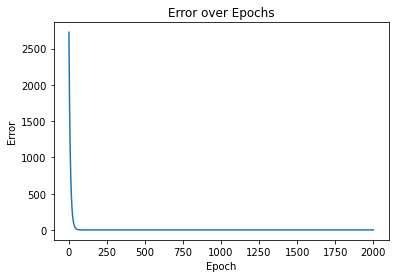

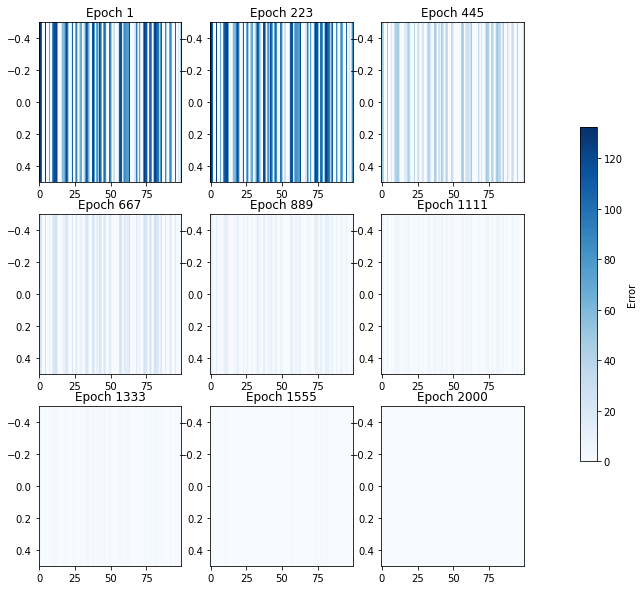

MSE test = 21.0573064268655


In [371]:
mlp_model = MLP(inputs_n=100, neurons=5, weight_init="he", normalize=False)
mlp_model.train(x_train, y_train, iters=2000, learn=0.001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

In [231]:
x_train = np.array(steps_train['x'])
y_train= np.array(steps_train['y'])
x_test = np.array(steps_test['x'])
y_test = np.array(steps_test['y'])
activation=sigm

MSE train = 1.2809702076006066e-05


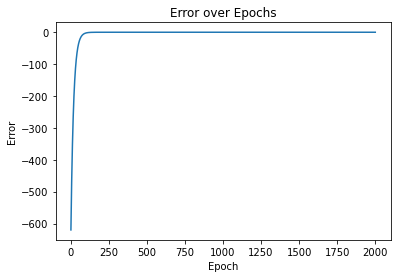

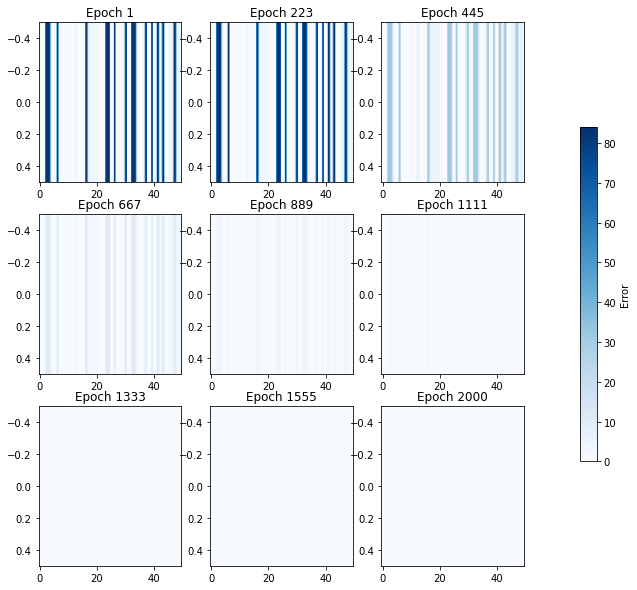

MSE test = 127.99765314111481


In [232]:
mlp_model = MLP(inputs_n=50, neurons=5, weight_init="uniform", normalize=False)
mlp_model.train(x_train, y_train, iters=2000, learn=0.001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

In [223]:
x_train = np.array(multimodal_train['x'])
y_train= np.array(multimodal_train['y'])
x_test = np.array(multimodal_test['x'])
y_test = np.array(multimodal_test['y'])

/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/663447378.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE train = 4.5013301679050315


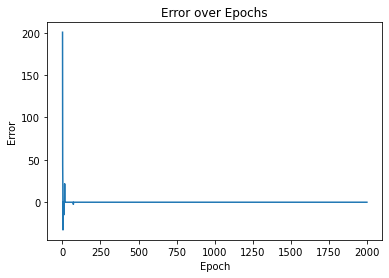

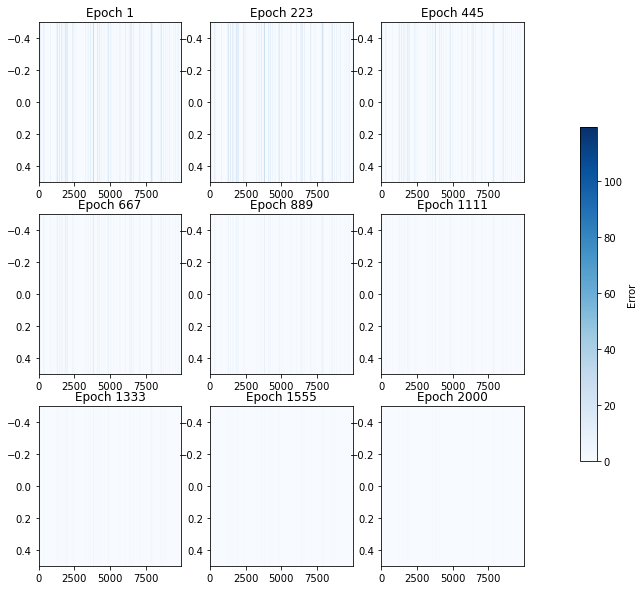

MSE test = 4.5402703776931705


In [224]:
mlp_model = MLP(inputs_n=len(multimodal_train), neurons=30, weight_init="he")
mlp_model.train(x_train, y_train, iters=2000, learn=0.0001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

## normalization test

# With noramlization

In [330]:
x_train = np.array(simple_train['x'])
y_train= np.array(simple_train['y'])
x_test = np.array(simple_test['x'])
y_test = np.array(simple_test['y'])
activation=sigm

/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/3559796962.py:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE train = 6.107178935889849e-11


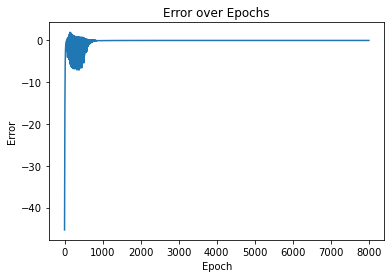

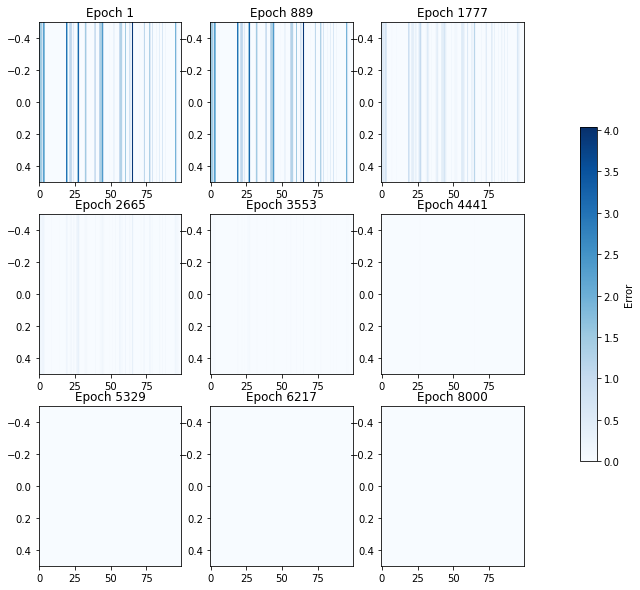

MSE test = 0.23293085087934112


/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/2816271009.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [314]:
mlp_model = MLP(inputs_n=100, neurons=5, weight_init="normal", normalize=True)
mlp_model.train(x_train, y_train, iters=8000, learn=0.001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

In [315]:
denormalized_data = y_test_predicted * (np.max(y_test) - np.min(y_test)) + np.min(y_test)
mse_out(denormalized_data,y_test)

29465.721874333154

/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/3559796962.py:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE train = 3.252488779416701


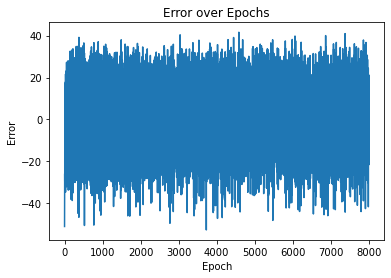

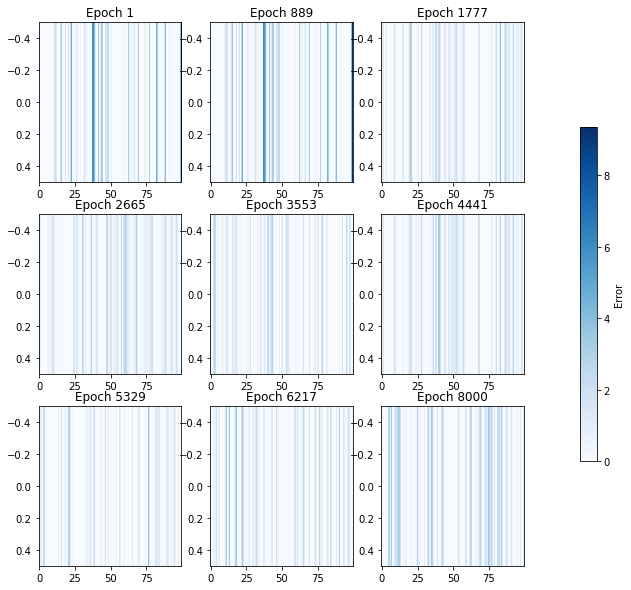

MSE test = 4.952485380489444


/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/2816271009.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [316]:
mlp_model = MLP(inputs_n=100, neurons=30, weight_init="normal", normalize=True)
mlp_model.train(x_train, y_train, iters=8000, learn=0.001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/3559796962.py:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE train = 0.13001450193984593


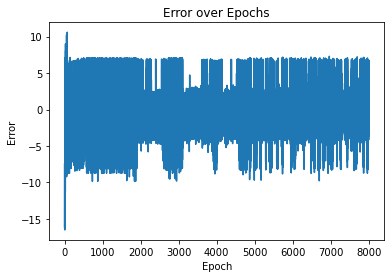

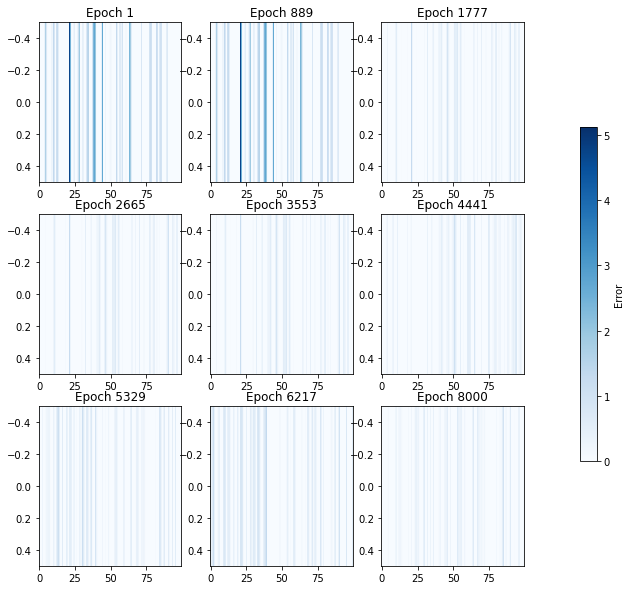

MSE test = 0.14282544124905766


/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/2816271009.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [317]:
mlp_model = MLP(inputs_n=100, neurons=10, weight_init="he", normalize=True)
mlp_model.train(x_train, y_train, iters=8000, learn=0.001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/3559796962.py:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE train = 9.248535920765068


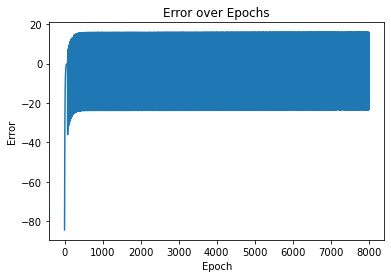

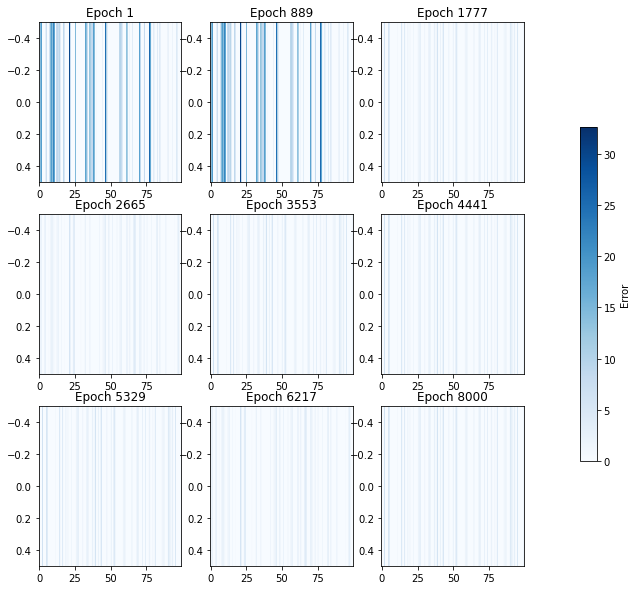

MSE test = 39.89492397135614


In [322]:
mlp_model = MLP(inputs_n=100, neurons=10, weight_init="xavier", normalize=True)
mlp_model.train(x_train, y_train, iters=8000, learn=0.001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

MSE train = 21.958105046373944


/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/3559796962.py:25: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


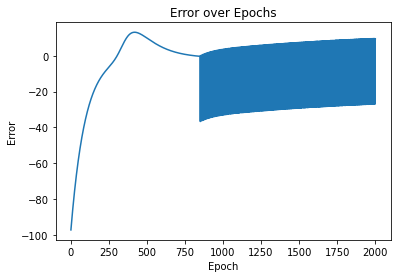

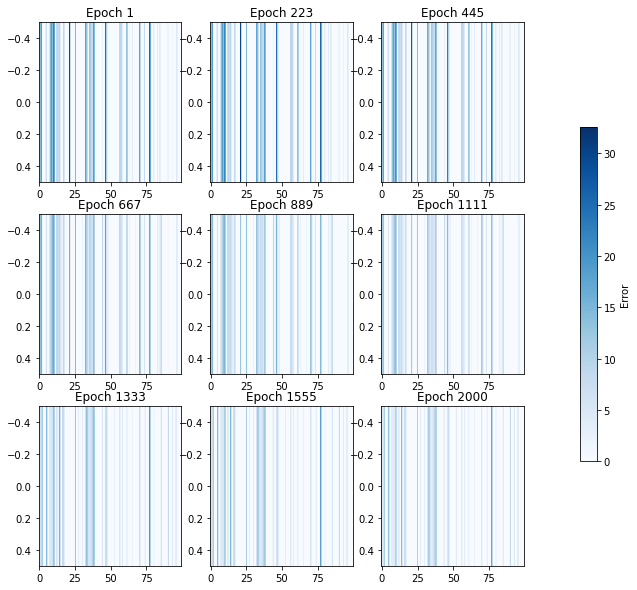

MSE test = 30.805068430263336


In [326]:
mlp_model = MLP(inputs_n=100, neurons=10, weight_init="xavier", normalize=True)
mlp_model.train(x_train, y_train, iters=2000, learn=0.0001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

# Without normalization

MSE train = 0.0010324486172242683


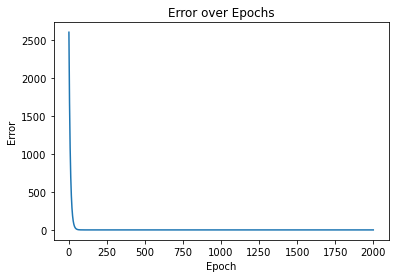

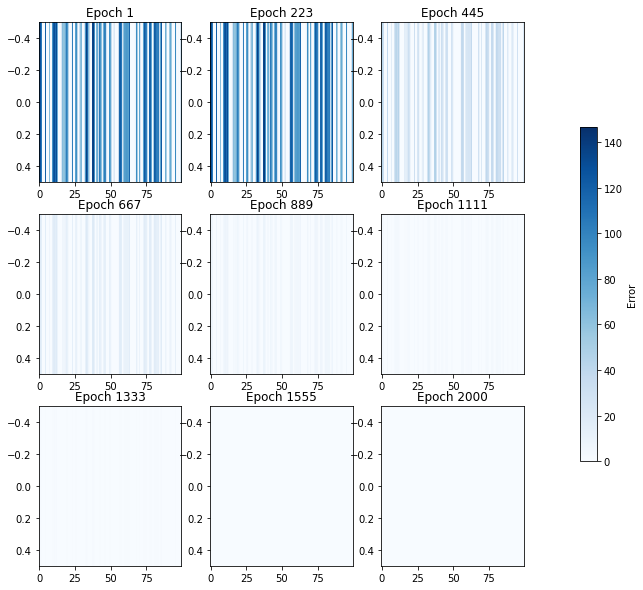

MSE test = 1867.0651119374422


/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_61146/2816271009.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [335]:
mlp_model = MLP(inputs_n=100, neurons=10, weight_init="xavier", normalize=False)
mlp_model.train(x_train, y_train, iters=2000, learn=0.001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

MSE train = 7.523624968093294e-12


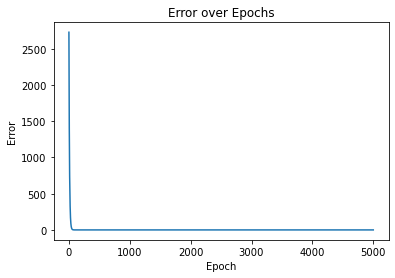

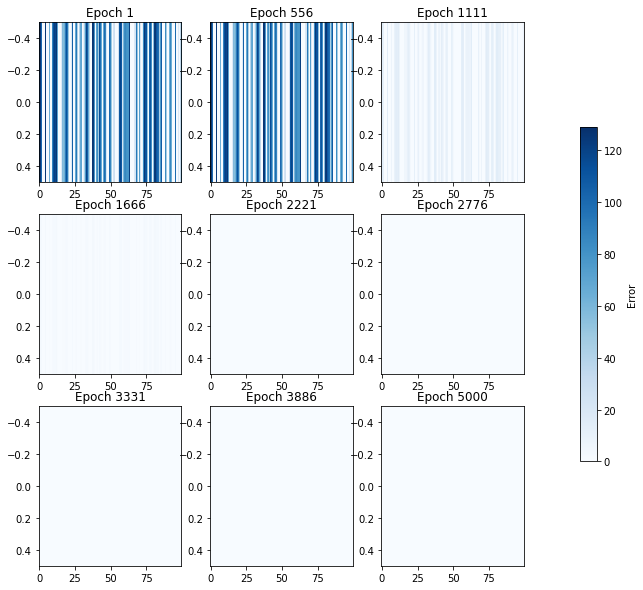

MSE test = 21.038290936268286


In [340]:
mlp_model = MLP(inputs_n=100, neurons=10, weight_init="normal", normalize=False)
mlp_model.train(x_train, y_train, iters=5000, learn=0.001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

# Batches

## 2 batches

In [62]:
mlp_model = MLP_batch(inputs_n=100, neurons=5, batch_size=2, weight_init="he", normalize=False)

In [63]:
x_train = np.array(simple_train['x'])
y_train= np.array(simple_train['y'])
x_test = np.array(simple_test['x'][:2])
y_test = np.array(simple_test['y'][:2])

mlp_model.train(x_train, y_train, iters=2000, learn=0.001)

MSE train after 1 batch =  1.0535589517310233
MSE train after 2 batch =  3.167813382466507e-05


/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_69521/1233987855.py:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [64]:
mlp_model.predict(x_test,y_test)

MSE test = 3754.7827058000516


array([[-129.64079031,   -5.5786261 ]])

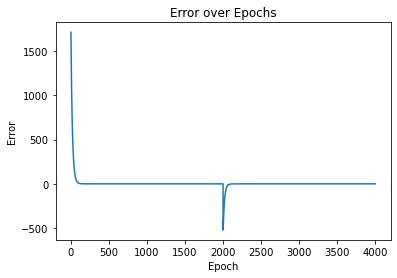

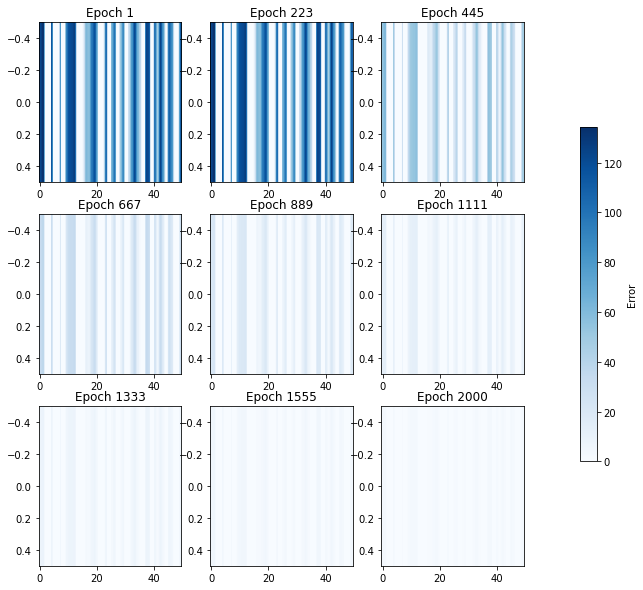

In [65]:
mlp_model.show_error()
mlp_model.show_matrix_error()

## 10 batches

In [58]:
mlp_model = MLP_batch(inputs_n=100, neurons=5, batch_size=10, weight_init="he", normalize=False)

In [59]:
x_train = np.array(simple_train['x'])
y_train= np.array(simple_train['y'])
x_test = np.array(simple_test['x'][:1])
y_test = np.array(simple_test['y'][:1])

mlp_model.train(x_train, y_train, iters=2000, learn=0.001)

/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_69521/1233987855.py:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE train after 1 batch =  30.661484003932856
MSE train after 2 batch =  3.1708810766058947e-05
MSE train after 3 batch =  8878.064495577815
MSE train after 4 batch =  2.285738125078517e-05
MSE train after 5 batch =  2313.7452059900625
MSE train after 6 batch =  4.08158938640074e-05
MSE train after 7 batch =  3.91840238295061e-05
MSE train after 8 batch =  6003.547975864422
MSE train after 9 batch =  4.216308967075804e-05
MSE train after 10 batch =  3.566481699763832e-05


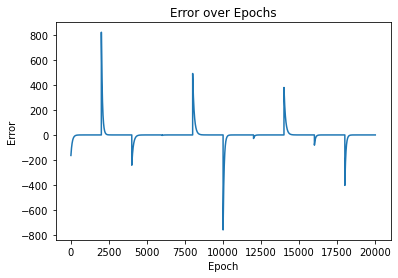

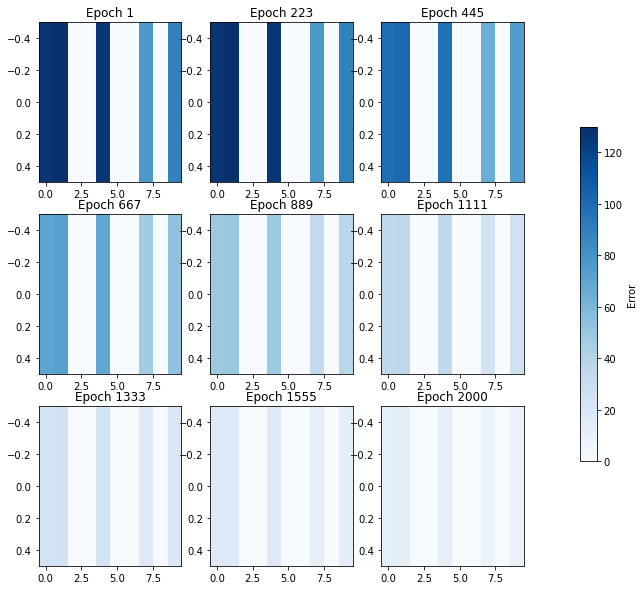

In [61]:
mlp_model.show_error()
mlp_model.show_matrix_error()

In [66]:
mlp_model = MLP_batch(inputs_n=100, neurons=5, batch_size=20, weight_init="he", normalize=False)

In [67]:
x_train = np.array(simple_train['x'])
y_train= np.array(simple_train['y'])
x_test = np.array(simple_test['x'][:1])
y_test = np.array(simple_test['y'][:1])

mlp_model.train(x_train, y_train, iters=2000, learn=0.001)

MSE train after 1 batch =  0.8485453910875161
MSE train after 2 batch =  4.7434716400997295e-05
MSE train after 3 batch =  4.441813969535481e-05


/var/folders/gg/2dzkwxx92bn382_mjh2vf1nh0000gn/T/ipykernel_69521/1233987855.py:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE train after 4 batch =  1269.1783891421321
MSE train after 5 batch =  12556.17813703951
MSE train after 6 batch =  2676.101513052898
MSE train after 7 batch =  2.482489279438569e-05
MSE train after 8 batch =  1.3541372780130953e-05
MSE train after 9 batch =  6.222763233916837e-06
MSE train after 10 batch =  2499.8274083445885
MSE train after 11 batch =  9.451816035511101e-06
MSE train after 12 batch =  2.0245998936290616e-05
MSE train after 13 batch =  2.9857154348735293e-05
MSE train after 14 batch =  10492.379001575902
MSE train after 15 batch =  4846.876895420205
MSE train after 16 batch =  1.5774083754851614e-05
MSE train after 17 batch =  1.243305379540683e-05
MSE train after 18 batch =  15315.31015154405
MSE train after 19 batch =  1.9818753545892252e-05
MSE train after 20 batch =  3.90032076409143e-05


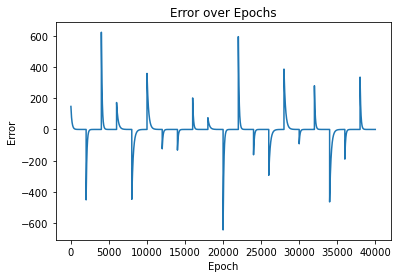

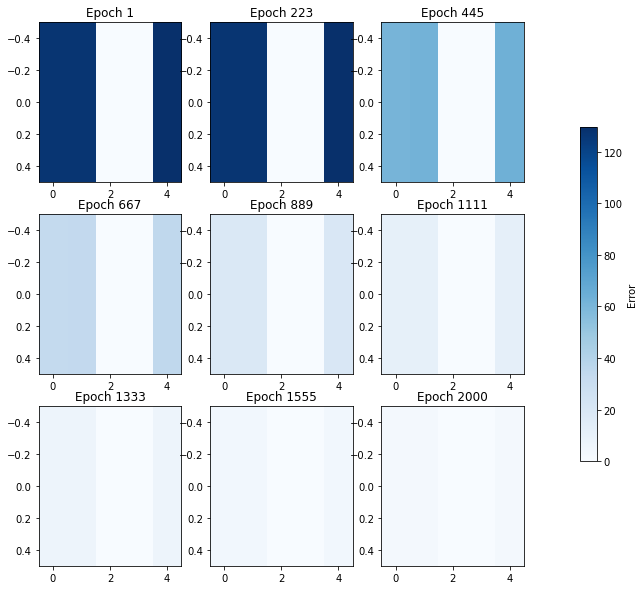

In [68]:
mlp_model.show_error()
mlp_model.show_matrix_error()

# 2 hidden layers

MSE train = 1.4850400189668353e-24


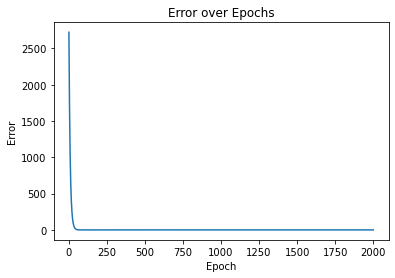

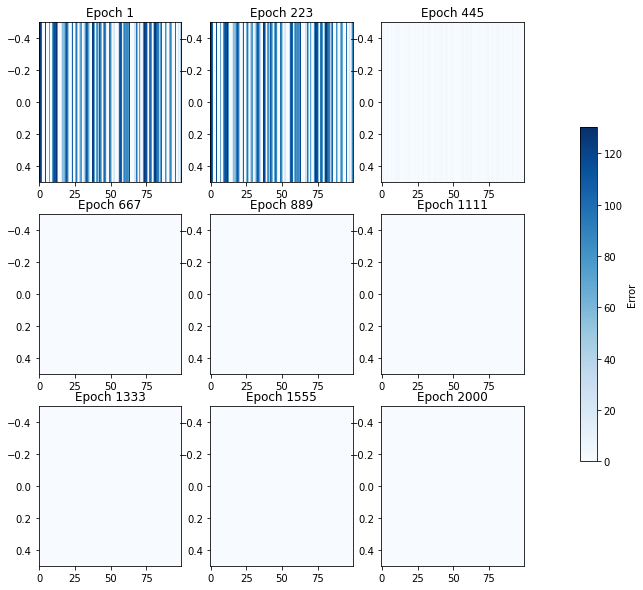

MSE test = 20.79087378930815


In [114]:
x_train = np.array(simple_train['x'])
y_train= np.array(simple_train['y'])
x_test = np.array(simple_test['x'])
y_test = np.array(simple_test['y'])
mlp_model = MLP_2layers(inputs_n=100, neurons_layer1=20, neurons_layer2=20)
mlp_model.train(x_train, y_train, iters=2000, learn=0.001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

MSE train = 3.9843281729923523e-26


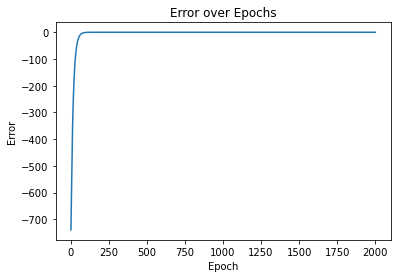

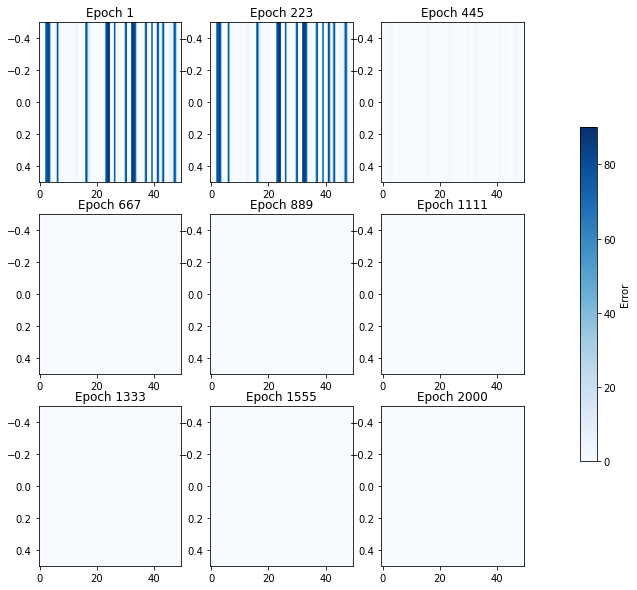

MSE test = 135.18249847359363


In [125]:
x_train = np.array(steps_train['x'])
y_train= np.array(steps_train['y'])
x_test = np.array(steps_test['x'])
y_test = np.array(steps_test['y'])
mlp_model = MLP_2layers(inputs_n=50, neurons_layer1=20, neurons_layer2=20)
mlp_model.train(x_train, y_train, iters=2000, learn=0.001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)

MSE train = 0.0011524496933507508


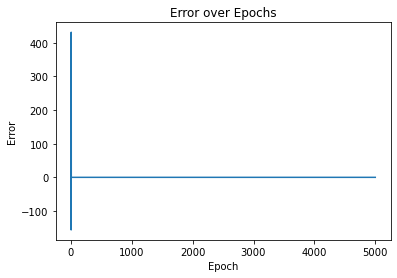

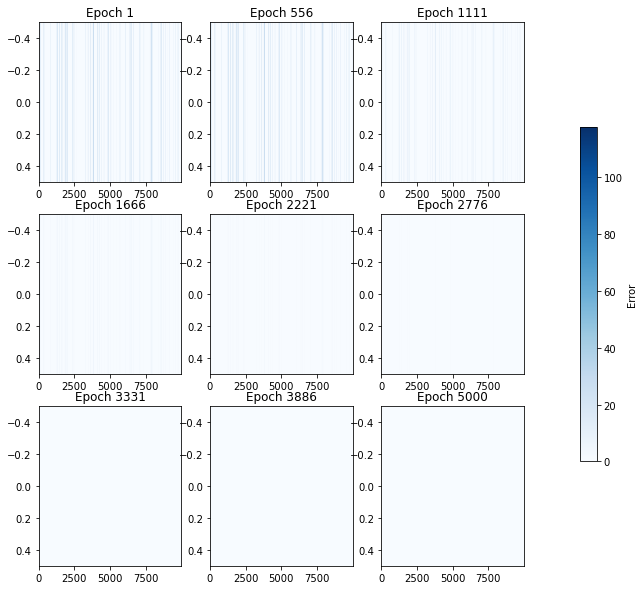

MSE test = 14.910222049671487


In [123]:
x_train = np.array(multimodal_train['x'])
y_train= np.array(multimodal_train['y'])
x_test = np.array(multimodal_test['x'])
y_test = np.array(multimodal_test['y'])
mlp_model = MLP_2layers(inputs_n=10000, neurons_layer1=20, neurons_layer2=20)
mlp_model.train(x_train, y_train, iters=5000, learn=0.0001)
mlp_model.show_error()
mlp_model.show_matrix_error()
y_test_predicted = mlp_model.predict(x_test,y_test)